<a href="https://colab.research.google.com/github/jeochris/DL-Lecture-Study/blob/main/Demo1_tensorflow_LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from platform import python_version

print(python_version())

3.7.12


In [ ]:
# Example 1: Linear Regression
# 1.1 Importing tensorflow and other libraries.
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

> **Real weight = 0.3, Real bias = 0.5**

* R에서 Simualting처럼 x, noise, y data 새로 생성
* np.random.rand(100) = 0~1 사이 표준정규분포 난수 100개 list 생성
* astype(np.float32) = float32로 형변환

[0.64149535 0.71783894 0.63814    0.41114652 0.0430636  0.7225532
 0.17141372 0.8692215  0.93527085 0.43233117 0.27963972 0.77879155
 0.89121425 0.4860412  0.79023314 0.59336454 0.7051833  0.17534792
 0.8007412  0.9107544  0.6153457  0.5997018  0.66666186 0.48231894
 0.64034414 0.51523125 0.13259687 0.37131003 0.1632775  0.37339488
 0.02110081 0.7967471  0.3717     0.6792049  0.7017474  0.26990178
 0.15951607 0.19420582 0.40392098 0.887332   0.27651078 0.52838403
 0.7181681  0.410937   0.99655455 0.02673706 0.02628563 0.46606478
 0.60728705 0.1093435  0.01828639 0.30165693 0.11079668 0.11888297
 0.49069265 0.42492303 0.8158338  0.21545449 0.54407704 0.2108674
 0.79760003 0.5884117  0.5354853  0.26558927 0.639805   0.6607136
 0.2666745  0.00184803 0.514712   0.1544836  0.6154392  0.89743847
 0.08112179 0.63703644 0.33313107 0.9487146  0.51040596 0.89961773
 0.6208778  0.78006405 0.12350212 0.02770457 0.5332955  0.4750798
 0.33073577 0.67813337 0.1529427  0.40408495 0.64382523 0.43183172

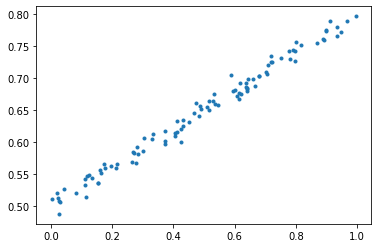

In [10]:
# 1.2 Creating input data using NumPy. y = x * 0.3 + 0.5 + noise (error)
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_data))
print(x_data)
y_data = 0.3 * x_data + 0.5 + noise

pylab.plot(x_data, y_data, '.')

> **Initial weight = W, Initial bias = b**

* W: 0~1 사이 임의의 값, b: 0



In [11]:
# 1.3 Building inference graph.
# Create Variables W and b that compute y_data = W * x_data + b
W = tf.Variable(tf.random.uniform([1], 0.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

print(W)
print(b)
print(y)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.02214777], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>
tf.Tensor(
[1.42076947e-02 1.58985350e-02 1.41333817e-02 9.10598040e-03
 9.53762792e-04 1.60029456e-02 3.79643240e-03 1.92513224e-02
 2.07141675e-02 9.57517326e-03 6.19339757e-03 1.72485001e-02
 1.97384115e-02 1.07647311e-02 1.75019056e-02 1.31417038e-02
 1.56182414e-02 3.88356624e-03 1.77346356e-02 2.01711822e-02
 1.36285387e-02 1.32820606e-02 1.47650763e-02 1.06822914e-02
 1.41821979e-02 1.14112254e-02 2.93672550e-03 8.22369102e-03
 3.61623336e-03 8.26986600e-03 4.67336009e-04 1.76461749e-02
 8.23232718e-03 1.50428768e-02 1.55421440e-02 5.97772375e-03
 3.53292585e-03 4.30122670e-03 8.94595124e-03 1.96524300e-02
 6.12409832e-03 1.17025301e-02 1.59058254e-02 9.10134055e-03
 2.20714658e-02 5.92166325e-04 5.82168286e-04 1.03222979e-02
 1.34500563e-02 2.42171506e-03 4.05002938e-04 6.68102968e-03
 2.45389994e-03 

**Forward, Back Propagtion 진행**
* keras.optimizers.Adam : Gradient Descent function
* keras.losses.MeanSquaredError()
* y_initial_values : initial weight, bias (not real)로 구한 y값 저장

**train_step**
* input = x_data
* y_pred : 현재 W, b로 output 계산한 predicted value -> error 값 = loss

In [12]:
# 1.4 Defining forward function and building training graph
def forward(x):
    return W * x + b

learning_rate=0.5
optimizer = tf.keras.optimizers.Adam(learning_rate)
loss_fn = tf.keras.losses.MeanSquaredError()

y_initial_values = y # Save initial values for plotting later.

def train_step(inputs):
    with tf.GradientTape() as tape:
        y_pred = forward(inputs)
        loss = loss_fn(y_data, y_pred)

    gradients = tape.gradient(loss, [W,b])
    optimizer.apply_gradients(zip(gradients, [W,b])) #
    return loss

* Forward, Back Propagation 200번 진행
  - loss 계속 줄어드는 것 확인
  - W -> 0.3, b -> 0.5


In [13]:
# 1.5 Performing training and check forwarded ouputs after 200th iteration
for step in range(201):
    loss = train_step(x_data)
    if step % 20 == 0:
        print("#%s \t W: %s b: %s loss: %s" % (step, W.numpy(), b.numpy(), loss.numpy()))
print(forward(x_data))

#0 	 W: [0.5221453] b: [0.4999988] loss: 0.4093293
#20 	 W: [0.28546286] b: [0.54821664] loss: 0.0041367463
#40 	 W: [0.29849476] b: [0.486592] loss: 0.002757802
#60 	 W: [0.30267325] b: [0.51354814] loss: 9.899115e-05
#80 	 W: [0.30124465] b: [0.5031414] loss: 0.00016697236
#100 	 W: [0.2954586] b: [0.50131345] loss: 0.00010639904
#120 	 W: [0.29702064] b: [0.50144535] loss: 9.6861775e-05
#140 	 W: [0.29737017] b: [0.502053] loss: 9.673236e-05
#160 	 W: [0.29717302] b: [0.5019312] loss: 9.658843e-05
#180 	 W: [0.29715306] b: [0.5018514] loss: 9.6586125e-05
#200 	 W: [0.29713094] b: [0.50183475] loss: 9.6586155e-05
tf.Tensor(
[0.6924429  0.71512693 0.6914459  0.6239991  0.51463026 0.71652764
 0.5527671  0.7601074  0.77973264 0.6302937  0.58492434 0.7332378
 0.7666421  0.64625263 0.7366375  0.6781417  0.71136653 0.55393606
 0.73975974 0.77244806 0.684673   0.68002474 0.6999206  0.6451466
 0.6921008  0.6549259  0.54123336 0.6121625  0.55034953 0.61278194
 0.50810444 0.73857296 0.61227834

Target values and Trained values very similar now

(0.0, 1.5)

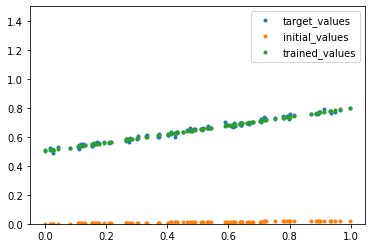

In [14]:
# 1.6 Comparing the initial regression line with the trained values.
pylab.plot(x_data, y_data, '.', label="target_values")
pylab.plot(x_data, y_initial_values, ".", label="initial_values")
pylab.plot(x_data, forward(x_data), ".", label="trained_values")
pylab.legend()
pylab.ylim(0, 1.5)